# Laboratorul 7

Rezolvați exercițiile de mai jos în celulele care v-au fost puse la dispoziție. La final, rulați tot notebook-ul și asigurați-vă că nu aveți erori. Salvați fișierul și încărcați-l în assignment-ul de Teams corespunzător grupei voastre.

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Exercițiul 1

Realizați graficele din figurile 1 și 2 din îndrumar pentru un semnal sinusoidal cu o frecvență aleasă de voi, _alta_ decât cea utilizată aici.

Reamintim că graficul din dreapta din figura 1 reprezintă înfășurarea semnalului pe cercul unitate, anume reprezentarea în planul complex a șirului $y[n] = x[n] \cdot e^{-2 \pi i n}$.

De asemenea, figura 2 arată influența diferitelor frecvențe de înfășurare asupra formei pe care o are această reprezentare. \
Afișați grafic $z_{\omega} [n] = x[n] \cdot e^{-2 \pi i \omega n}$, pentru **patru valori diferite** ale $\omega$, dintre care una egală cu frecvența semnalului.

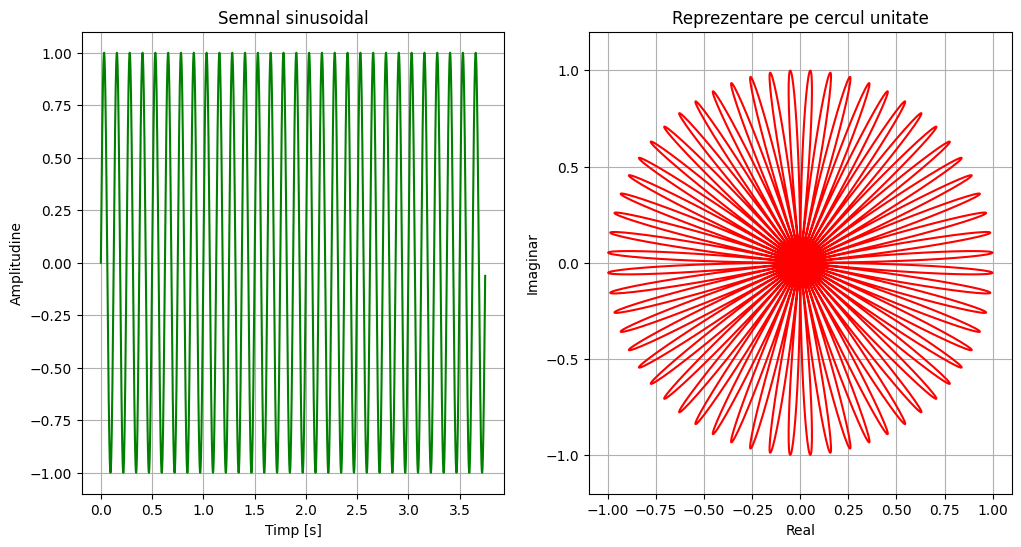

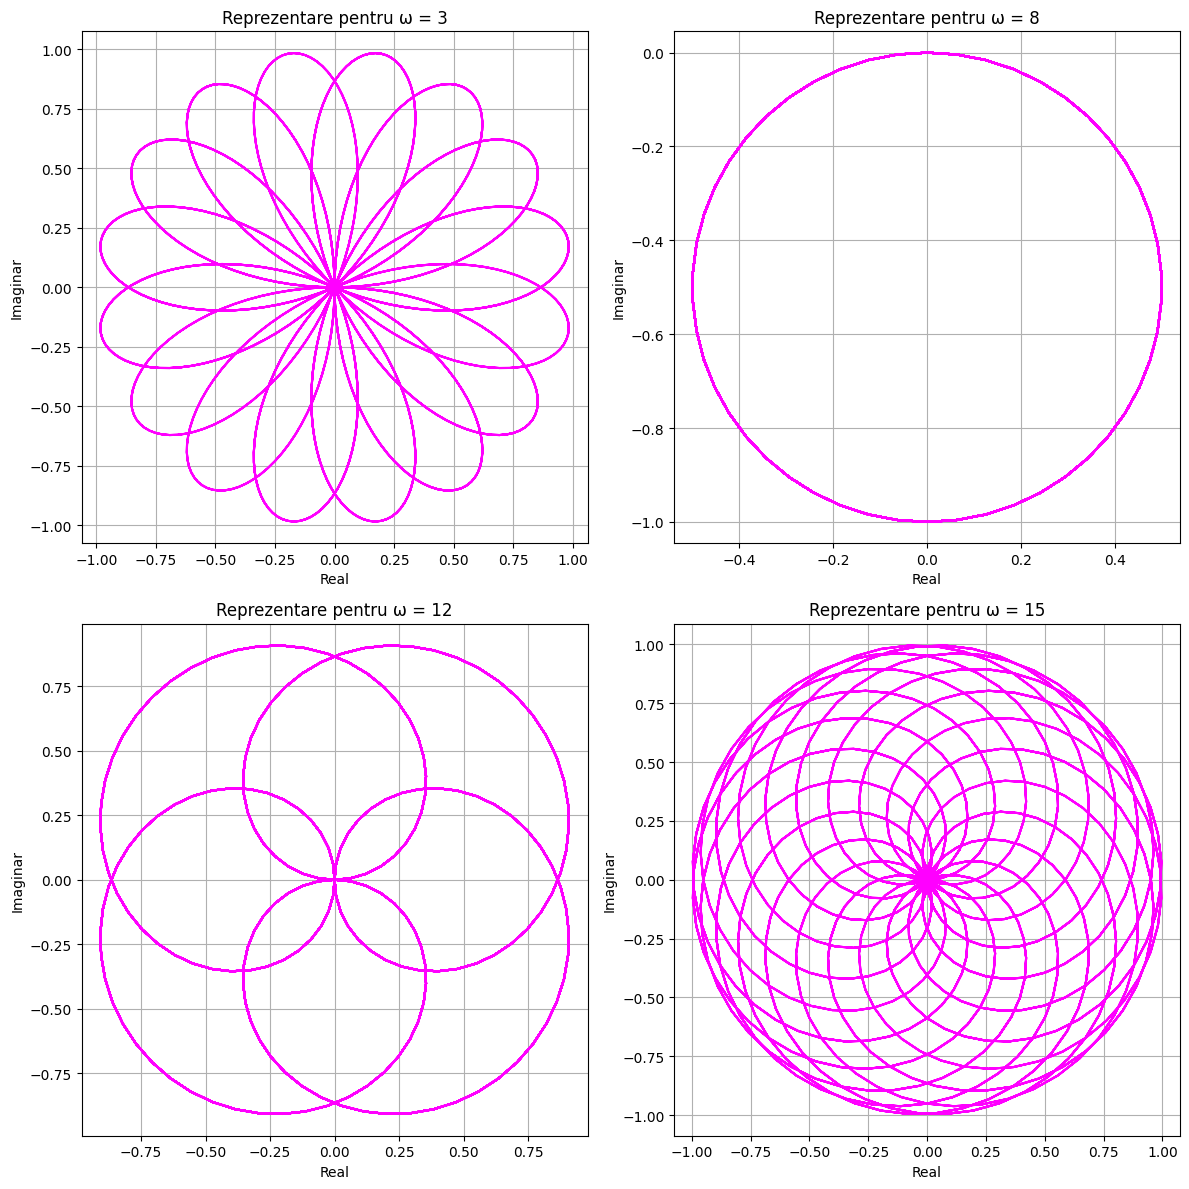

In [6]:
f = 8
fs = 800
N = 3000
t = np.arange(N) / fs

x = np.sin(2 * np.pi * f * t)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t, x, color='g')
plt.title('Semnal sinusoidal')
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.grid(True)

n = np.arange(N)
y = x * np.exp(-2j * np.pi * n / N)

plt.subplot(1, 2, 2)
plt.plot(y.real, y.imag, color='r')
plt.scatter([0], [0], color='b')
plt.title('Reprezentare pe cercul unitate')
plt.xlabel('Real')
plt.ylabel('Imaginar')
plt.grid(True)
plt.axis('equal')
plt.show()

frec = [3, 8, 12, 15]

plt.figure(figsize=(12, 12))

for i, w in enumerate(frec):
    z_w = x * np.exp(-2j * np.pi * w * n / fs)
    plt.subplot(2, 2, i + 1)
    plt.plot(z_w.real, z_w.imag, color='magenta')
    plt.title(f'Reprezentare pentru ω = {w}')
    plt.xlabel('Real')
    plt.ylabel('Imaginar')
    plt.grid(True)
    plt.axis('equal')

plt.tight_layout()
plt.show()

## Exercițiul 2

Afișați **modulul** (valoarea absolută) a transformatei Fourier (folosind relația 1 din PDF) pentru un semnal compus de voi, având **cel puțin trei componente de frecvență distincte** (obțineți un grafic asemănător figurii 3).

Ajustați frecvențele de înfășurare $\omega$ utilizate în transformata Fourier în funcție de frecvența caracteristică a sinusoidei.

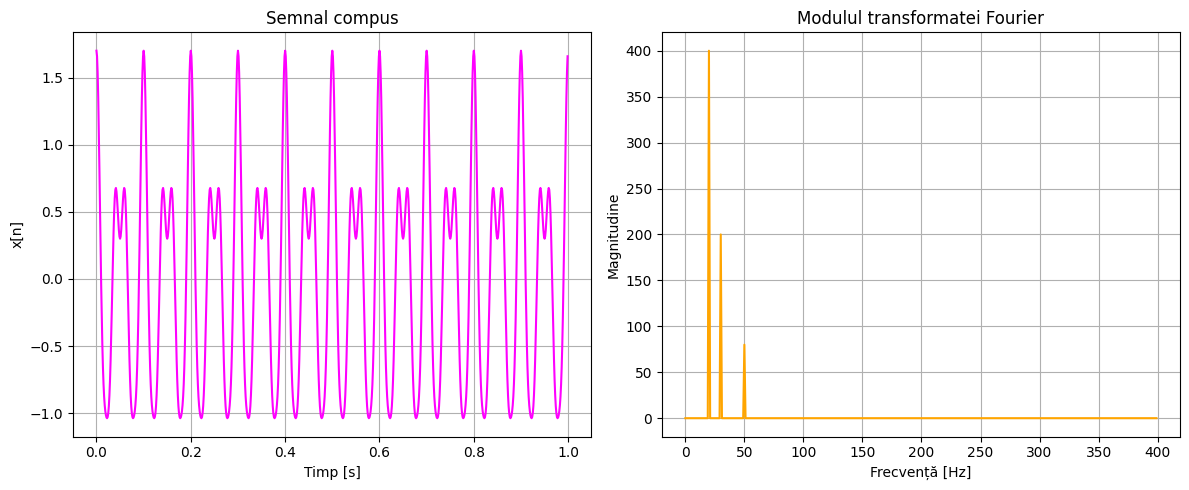

In [8]:
fs = 800
T = 1
N = fs * T
t = [n / fs for n in range(N)]

f1, f2, f3 = 20, 30, 50
x = [math.cos(2*math.pi*f1*tn) + 0.5*math.cos(2*math.pi*f2*tn) + 0.2*math.cos(2*math.pi*f3*tn) for tn in t]

X_mag = []
for k in range(N):
    real = sum(x[n] * math.cos(2*math.pi*k*n/N) for n in range(N))
    imag = -sum(x[n] * math.sin(2*math.pi*k*n/N) for n in range(N))
    X_mag.append(math.sqrt(real**2 + imag**2))

frec = [k * fs / N for k in range(N)]

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(t, x, color='magenta')
plt.title('Semnal compus')
plt.xlabel('Timp [s]')
plt.ylabel('x[n]')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(frec[:N//2], X_mag[:N//2], color='orange')
plt.title('Modulul transformatei Fourier')
plt.xlabel('Frecvență [Hz]')
plt.ylabel('Magnitudine')
plt.grid(True)

plt.tight_layout()
plt.show()
